In [1]:
from utils import *

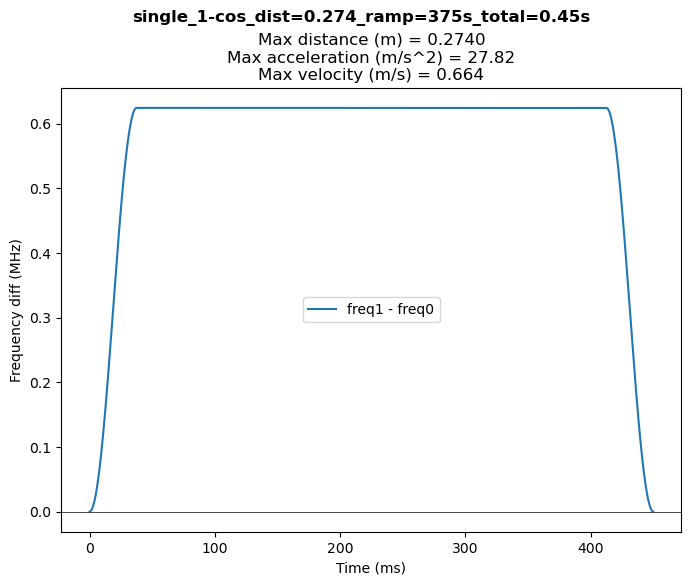

Table saved as 2023-08-28_18-12-43_single_1-cos_dist=0.274_ramp=375s_total=0.45s.txt
Figure saved as 2023-08-28_18-12-43_single_1-cos_dist=0.274_ramp=375s_total=0.45s.txt.png


In [2]:
t_tot = 0.45 # Total frequency sweep time in units of seconds
t_inc = 1 # Increment time length, in integer multiples of 100 us
t_ramp = 375
dist = 0.274 # Total transport distance in units of meters

trajName = f'single_1-cos_dist={dist}_ramp={t_ramp}s_total={t_tot}s'
t_vec, freqdiff = freqdiff_flattop(t_inc, t_tot, t_ramp, dist=dist)

fig = make_figure(freqdiff, t_inc, trajName)
save_table(freqdiff, t_inc, trajName, fig)

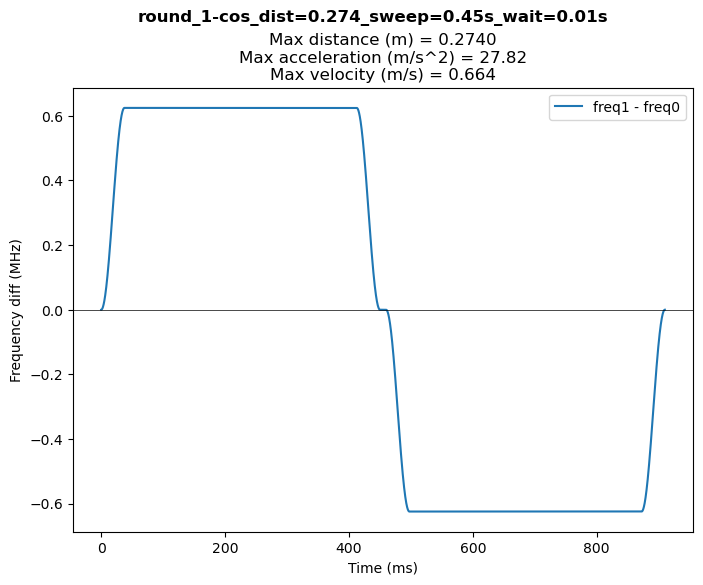

In [5]:
wait_time = 0.01 # Time to wait at the end of the transport in units of seconds

t_tot = 0.45 # Total frequency sweep time in units of seconds
t_inc = 1 # Increment time length, in integer multiples of 100 us
t_ramp = 375
dist = 0.274 # Total transport distance in units of meters

trajName = f'round_1-cos_dist={dist}_sweep={t_tot}s_wait={wait_time}s'
t_vec, freqdiff = round_trip(freqdiff_flattop)(wait_time, t_inc, t_tot, t_ramp, dist=dist)

fig = make_figure(freqdiff, t_inc, trajName)
# save_table(freqdiff, t_inc, trajName, fig)